In [7]:
# I.
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np

# II
# Download reference table
w_land = pd.read_csv('/home/hmdg/Documents/Data_Science/Repos/Lands/data/w_land.csv')

#  wlands16 Backup
w_land = w_land.copy()

# III Convert the df into geopandas df
w_land['geometry'] = w_land['geometry'].apply(wkt.loads)
w_land = gpd.GeoDataFrame(w_land, geometry='geometry')


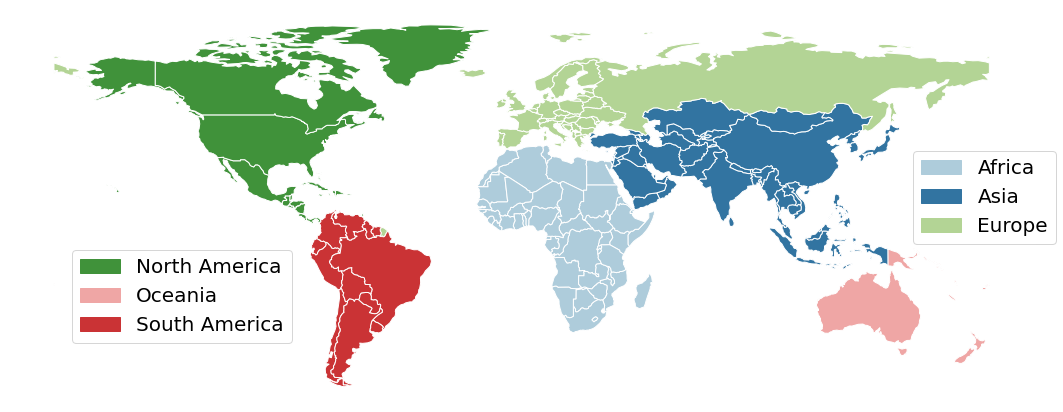

In [8]:
# VI
%matplotlib inline

plt.rcParams.update({'ytick.labelleft':'off',
                     'ytick.labelright':'off',
                     'xtick.labelbottom':'off',
                     'axes.spines.left': False,
                     'axes.spines.bottom' : False,
                     'axes.spines.top': False,
                     'axes.spines.right':False,
                     'ytick.left':False,
                     'xtick.bottom':False,
                     })

# Note: this color_list variable is created in the ha_ref.ipynb file; in order to use the same colors
# in both plots: ha_ref and world_map
c_list = [(0.6808823529411763, 0.7985294117647057, 0.8602941176470589, 1.0), 
              (0.19460784313725488, 0.4563725490196078, 0.632843137254902, 1.0),
              (0.7004901960784313, 0.8328431372549019, 0.5828431372549019, 1.0),
              (0.25, 0.5705882352941177, 0.22941176470588232, 1.0), 
              (0.9362745098039217, 0.6509803921568625, 0.6480392156862743, 1.0),
              (0.7916666666666666, 0.20049019607843133, 0.20637254901960778, 1.0)]

w_cont = w_land.continent.unique()



fig, cx1 = plt.subplots(1, 1, figsize=(15, 15))

for c in range(len(c_list)):
    cx1 = w_land[w_land["continent"] == w_cont[c]].plot(ax=cx1, color=c_list[c], 
                                        legend=True,
                                        edgecolor='white')

    
cx1.patch.set_facecolor('white')

## Adding the legend
patchList = []
for k in range(len(c_list)):
        data_color = mpatches.Patch(color=c_list[k], label=w_cont[k])
        patchList.append(data_color)


l1 = plt.legend(handles=patchList[3:6], ncol=1, loc='lower center', bbox_to_anchor=(0.17,0.13), fontsize=20)
l2 = plt.legend(handles=patchList[:3], ncol=1, loc='lower center', bbox_to_anchor=(0.95,0.38), fontsize=20)

plt.gca().add_artist(l1)

plt.tight_layout()

plt.savefig('/home/hmdg/Documents/Data_Science/Repos/Lands/images/world_map.png', bbox_inches='tight')
plt.show()
